# CLASIFICACION CON SVM Y NN

En la presente actividad se va a emplear un dataset que contiene información de características de celulares para clasificarlos en un rango de precios.

La información del *dataset* es:
* *battery_power*: Energía total que una batería puede almacenar en un tiempo medido en *mAh*
* *blue*: Indica si tiene *bluetooth* o no
* *clock_speed*: Velocidad del microprocesador
* *dual_sim*: Indica si tiene soporte dual de *sim* o no
* *fc*: Megapíxeles de la cámara frontal
* *four_g*: Indica si tiene 4G o no
* *int_memory*: Memoria interna en GB
* *m_dep*: Grosor del celular en cm
* *mobile_wt*: Peso del celular
* *n_cores*: Número de núcleos del procesador
* *pc*: Megapíxeles de la cámara principal
* *px_height*: Alto de la resolución de píxeles
* *px_width*: Ancho de resolución de píxeles
* *ram*: RAM en MB
* *sc_h*: Alto de la pantalla en cm
* *sc_w*: Ancho de la pantalla en cm
* *talk_time*: tiempo máximo que durará una sola carga de la batería
* *tres_g*: Indica si es 3G o no
* *touch_screen*: Indica si tiene pantalla táctil o no
* *wifi*: Indica si tiene wifi o no
* ***price_range***: Es la variable objetivo con valor 0 (bajo costo), 1 (costo medio), 2 (costo alto) y 3 (costo muy alto).

### IMPORTACIÓN DE LIBRERIAS A UTILIZAR

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

### CARGA DEL DATASET

In [2]:
# Cargamos el dataset , utilizando la ruta adecuada
data = pd.read_csv('C:/Users/mgran/Documents/Aprendizaje/Maestría/ASIGNATURAS PRIMER SEMESTRE/Aprendizaje Automático/ACT 2/train.csv')

In [3]:
#Verificación tamaño del dataset
print(f'El dataset train.csv tiene el número de registros : {data.shape[0]}')

El dataset train.csv tiene el número de registros : 2000


In [4]:
#Información de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
#Verificación de datos nulos
count_null = data.isnull().sum()
cols_null = count_null[count_null > 0]
cols_null = (cols_null / data.shape[0]) * 100
display(cols_null)

Series([], dtype: float64)

Como podemos ver, no tenemos valores nulos en este dataset, lo cual hará más sencillo el proceso de análisis y modelado. Al no tener valores nulos significa que no tenemos que desarrollar técnicas de imputación o de eliminación de datos faltantes. De cualquier manera el EDA debe ser desarrollado para comprender la estructura de los datos, distribuciones y si existe algún problema en los datos. 

# 1. ANÁLISIS DESCRIPTIVO DE DATOS


## Variables numéricas

In [6]:
#Resumen estadístico de las variables
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Tal como podemos ver nuestro dataset consta de 8 filas y de 21 columnas, entre las cuales estan distribuidos todos los datos.

### **1.1. Escriba el código que permita crear la matriz de correlación de todas las variables numéricas:**

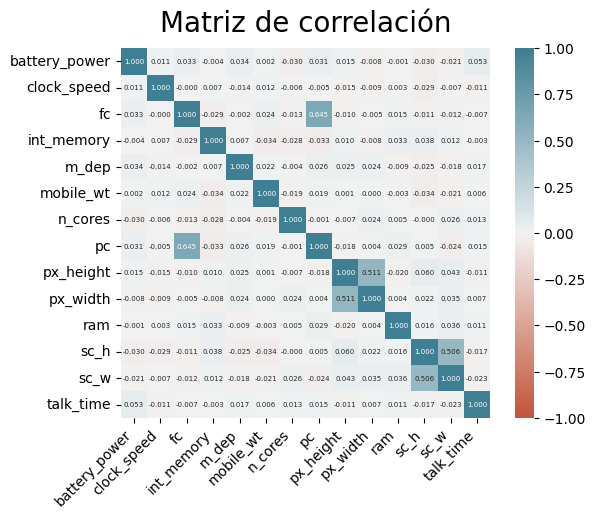

In [7]:
#Vamos a ingresar el código necesario para correlacionar las variable númericas que hemos considerado para el dataset
# Nos apoyaremos en la matriz de correlación
lst_numv = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
            'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
            'sc_h', 'sc_w', 'talk_time']

data_num = data[lst_numv]

corr = data_num.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws={"size": 5},
    fmt=".3f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_title('Matriz de correlación', fontdict={'fontsize':20}, pad=12);

Analizando la matriz, es notorio que existe gran correlación entre las variables *px_height* y *px_width*, *sc_h* y *sc_w*, con tiempo máximo que durará una sola carga de la bateria(*talk_time*), mismo que a su vez se correlaciona fuertemente a la energía total que la batería puede almacear en un tiempo con la variable fisic de consumo energetico (*mAh*). 

## Variables catégoricas

### **1.2. Escriba el código para su análisis y la creación de gráficos de frecuencia:**


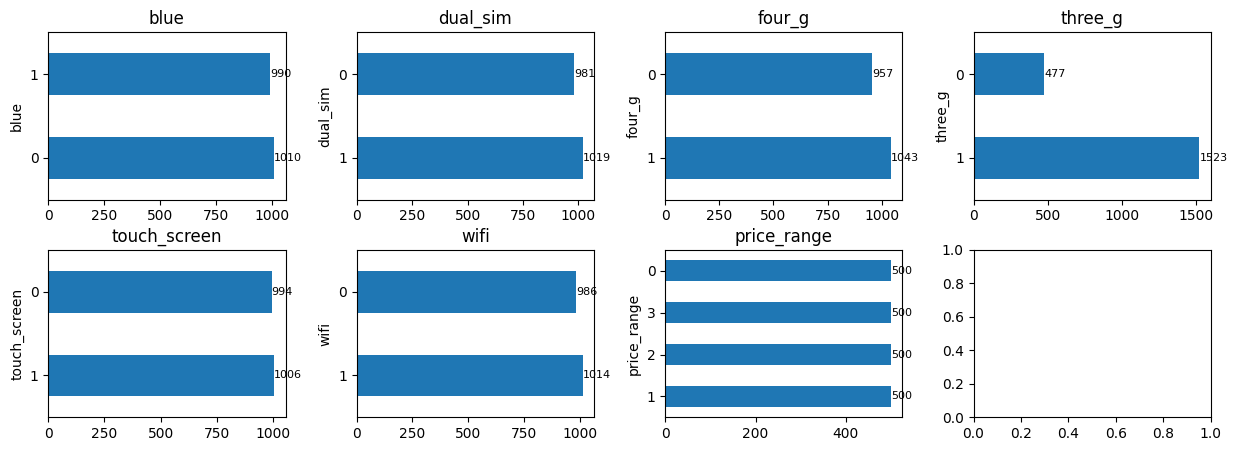

In [8]:
# Gráficaremos las variables de categoría

lst_cat = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Iterar sobre las columnas categóricas y gráficar
for col, ax in zip(lst_cat, axes.ravel()):
    if col in data.columns:                                  # Verificar si la columna existe 
        bars = data[col].value_counts().plot.barh(ax=ax)     # Graficar el conteo de valores
        ax.set_title(col)
        
        
        for container in bars.containers:
            ax.bar_label(container, fontsize=8)
    else:
        print(f"La columna '{col}' no existe.")  #Nos mostrara si alguna columna no existe

plt.show()

Aquí podemos ver como están distribuidos los valores en cada una de las categorías que hemos analizado previamente.

### **1.3. Escriba el código que permita validar si el dataset está balanceado**

Distribución de las clases:
price_range
1    25.0
2    25.0
3    25.0
0    25.0
Name: proportion, dtype: float64


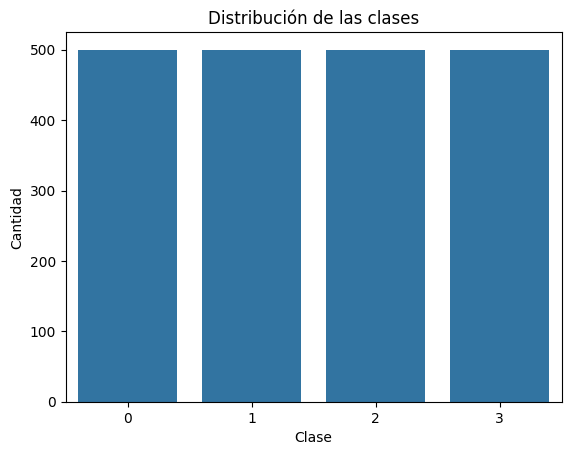

El dataset está balanceado.


In [9]:
# Calculamos la distribución de las clases
class_distribution = data['price_range'].value_counts(normalize=True) * 100

# Mostrar la distribución
print("Distribución de las clases:")
print(class_distribution)

# Visualizar la distribución
sns.countplot(x='price_range', data=data)  # Corregido: se añade `data=data`
plt.title('Distribución de las clases')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

# Validar si el dataset está balanceado
if class_distribution.std() < 5:  # Puedes ajustar este umbral según tu criterio
    print("El dataset está balanceado.")
else:
    print("El dataset no está balanceado.")

## PREPROCESAMIENTO DE DATOS

In [10]:
#Crear una copia del dataset para modificaciones
data2 = data.copy()

In [11]:
#Verificar tamaño
print(f'El dataset copia tiene el número de registros : {data2.shape[0]}')

El dataset copia tiene el número de registros : 2000


In [12]:
# Separación de los datos en train y test
X = data2.drop(columns = 'price_range')
y = data2['price_range']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

column_names = X_train.columns.tolist() #Realizamos una extracción de las variables que estan en nuestro apartado X_train para verificar.

### Escriba el código que permita reescalar todos los atributos del dataset utilizando la función del StandardScaler:

In [13]:
# Creamos una instancia para utilizar StandardScaler
scaler = StandardScaler()
# Aplicamos el escalado a los datos de entrenamiento y prueba
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nDataset reescalado con StandardScaler:")
print("Nombres de las variables:", column_names)
print(X_train[:3])


Dataset reescalado con StandardScaler:
Nombres de las variables: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
[[-1.26025416 -0.99750312  0.83126035 -1.00250313 -0.76156875  0.9619725
   0.37807883 -1.04701904 -1.57888055 -1.53547423 -0.81063612  0.48560941
  -0.5662908  -0.04193906  0.15916664  0.28903083 -0.92222985  0.56291423
  -1.         -1.01511421]
 [-0.16850963 -0.99750312 -1.25475142 -1.00250313  0.39057762 -1.03953075
   1.59434412 -1.39271249 -1.43797669  1.06656507 -0.14956691  1.27236497
   0.01415561 -0.28773577  0.87788713  0.05745881  0.35912164 -1.77646958
   1.          0.98511083]
 [ 0.37508817 -0.99750312  0.34043405  0.99750312 -0.99199803 -1.03953075
  -0.50647774 -1.39271249 -0.81799972 -0.6681278  -1.47170533 -0.97775592
  -1.27392666  0.42305694 -0.31998035 -1.33197334  0.35912164  0.562914

Podemos verificar que la normalización de datos fue exitosa. Debido a que nuestras variables tienen diferentes tipos de unidades lo más recomendable es normalizarlas, de esta manera al trabajar posteriormente con algoritmos como SVN, KNN, regresión lineal, redes neuronales y PCA, podríamos mejorar su desempeño, ya que son muy sensibles a la escala de variables.

# 2. Aplicación de SVM sobre los datos


### **2.1. Escriba el código que permita crear un modelo utilizando SVM con kernel lineal, el valor de C =1 y la semilla aleatoria es de 1234:**

In [14]:
# Modelo SVM con kernel lineal, C=1 y semilla aleatoria 1234
modeloSVM = SVC(kernel='linear', C=1, random_state=1234)
# Entrenamos el modelo
modeloSVM.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=1234)

In [15]:
# Predicciones test
predictSVM = modeloSVM.predict(X_test)

### **2.2. Escriba el código que permita hallar la exactitud (accuracy) del modelo SVM anteriormente entrenado:**

In [16]:
#Imprimimos los resultados del entrenamiento del modelo SVM
class_label = ['bajo_costo_0', 'costo_medio_1', 'costo_alto_2', 'costo_muy_alto_3']
print("\nModelo SVM con kernel lineal, C=1 y semilla aleatoria 1234:")
print(classification_report(y_test, predictSVM, target_names=class_label))


Modelo SVM con kernel lineal, C=1 y semilla aleatoria 1234:
                  precision    recall  f1-score   support

    bajo_costo_0       0.97      0.98      0.97        87
   costo_medio_1       0.95      0.93      0.94       100
    costo_alto_2       0.94      0.94      0.94       116
costo_muy_alto_3       0.96      0.97      0.96        97

        accuracy                           0.95       400
       macro avg       0.95      0.95      0.95       400
    weighted avg       0.95      0.95      0.95       400



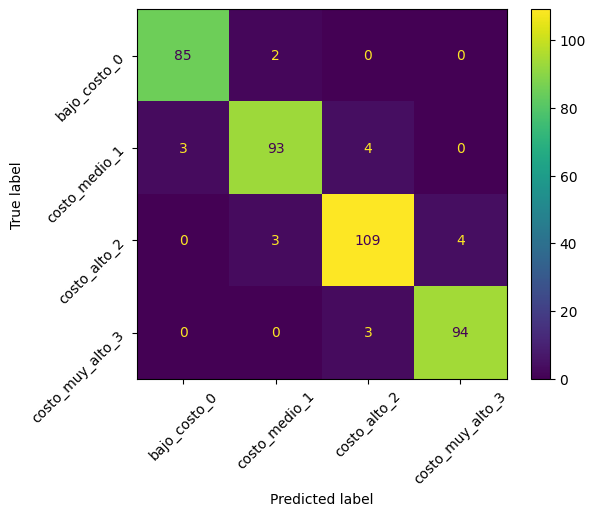

In [17]:
#Matriz de confusión para modelo SVM con kernel lineal 
y_labels = [0, 1, 2, 3]
cm = confusion_matrix(y_test, predictSVM, labels=y_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot()
plt.xticks(rotation=45)  
plt.yticks(rotation=45)  
plt.show()

Interpretación de la matriz
* bajo_costo_0:             
- 85 TP, 2 FP
* costo_medio_1
- 93 TP, 4 FP, 3 FN
* Costo_alto_2:
- 109 TP, 4 FP, 3 FN
* Costo_muy_alto_3:
- 94 TP, 3 FN

### **2.3. Escriba el código que permita encontrar los mejores parámetros para el modelo  SVM, con un param_grid = {'C': np.linspace(0.1, 100, 200), 'kernel': ('linear', 'rbf')**

#### Tunear hiperparámetros

In [18]:
# Búsqueda de hiperparámetros con un param_grid = {'C': np.linspace(0.1, 100, 200), 'kernel': ('linear', 'rbf')
param_grid = {'C': np.linspace(0.1, 100, 200), 'kernel': ['linear', 'rbf'] }
# Configuración GridSearchCV , utilizare los recursos de mi LAPTOP n_jobs=-1
grid_search = GridSearchCV(estimator=modeloSVM, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
# GridSearchCV ajustado a los datos de entrenamiento
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C=1, kernel='linear', random_state=1234),
             n_jobs=-1,
             param_grid={'C': array([  0.1       ,   0.60201005,   1.1040201 ,   1.60603015,
         2.1080402 ,   2.61005025,   3.1120603 ,   3.61407035,
         4.1160804 ,   4.61809045,   5.1201005 ,   5.62211055,
         6.1241206 ,   6.62613065,   7.1281407 ,   7.63015075,
         8.1321608 ,   8.63417085,   9.1361809 ,   9.63819095,
        10.14020101,  10.64221106,  11.14422111,  11.646...
        86.44572864,  86.94773869,  87.44974874,  87.95175879,
        88.45376884,  88.95577889,  89.45778894,  89.95979899,
        90.46180905,  90.9638191 ,  91.46582915,  91.9678392 ,
        92.46984925,  92.9718593 ,  93.47386935,  93.9758794 ,
        94.47788945,  94.9798995 ,  95.48190955,  95.9839196 ,
        96.48592965,  96.9879397 ,  97.48994975,  97.9919598 ,
        98.49396985,  98.9959799 ,  99.49798995, 100.        ]),
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

### **2.4. Escriba el código que permita conocer los mejores parámetros encontrados en el ítem anterior**

In [19]:
# Evaluación el modelo con los mejores parámetros en el conjunto de prueba
print("Mejores parámetros encontrados al tunear hiperparámetros:")
print(grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Mejores parámetros encontrados al tunear hiperparámetros:
{'C': np.float64(20.682412060301512), 'kernel': 'linear'}


### **2.5. Escriba el código que permita hallar la exactitud del modelo de SVM aplicando los mejores parámetros**

In [20]:
# Accuracy de test del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo de SVM aplicando los mejores parámetros: {accuracy:.2f}")


Precisión del modelo de SVM aplicando los mejores parámetros: 0.96


### **2.6. Escriba el código que permita hallar las métricas del modelo entrenado en el ítem anterior. Utilice la función classification_report**

In [21]:
# Reporte de clasificación de búsqueda de hiperparámetros con un param_grid = {'C': np.linspace(0.1, 100, 200), 'kernel': ('linear', 'rbf')
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=class_label))


Reporte de clasificación:
                  precision    recall  f1-score   support

    bajo_costo_0       0.98      0.98      0.98        87
   costo_medio_1       0.96      0.94      0.95       100
    costo_alto_2       0.95      0.97      0.96       116
costo_muy_alto_3       0.98      0.98      0.98        97

        accuracy                           0.96       400
       macro avg       0.97      0.97      0.97       400
    weighted avg       0.97      0.96      0.96       400



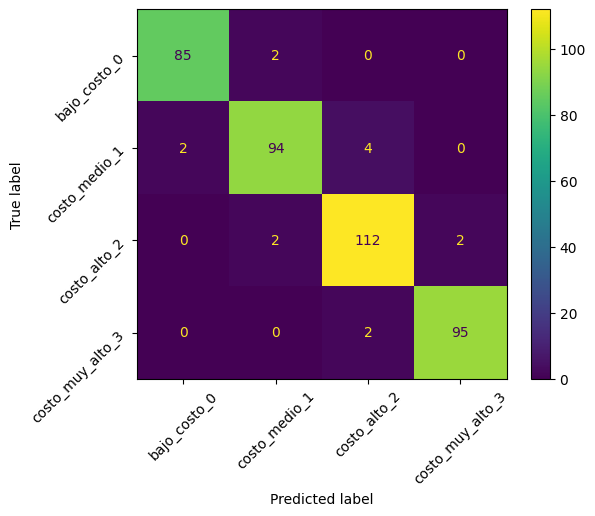

In [22]:
#Matriz de confusión para modelo SVM con tuneo de hiperparametros
y_labels = [0, 1, 2, 3]
cm = confusion_matrix(y_test, y_pred, labels=y_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot()
plt.xticks(rotation=45)  
plt.yticks(rotation=45)  
plt.show()

Interpretación de la matriz

* bajo_costo_0:
- 85 TP, 2 FP
* costo_medio_1
- 94 TP, 4 FP, 2 FN
* Costo_alto_2:
- 112 TP, 2 FP, 2 FN
* Costo_muy_alto_3:
- 95 TP, 2 FN

# 3. REDES NEURONALES

### **3.1. Escriba el código que permita entrenar un perceptrón multicapa con 3 capas ocultas con 200, 100 y 50 neuronas respectivamente en cada capa. Función de activación 'Relu' y random_state=1**

In [23]:
# Perceptrón multicapa con 3 capas ocultas con 200, 100 y 50 neuronas. Función de activación 'Relu' y random_state=1
classifier = MLPClassifier(hidden_layer_sizes=(200, 100, 50), 
                           activation='relu', 
                           random_state=1, 
                           max_iter=500, 
                           solver='adam', 
                           learning_rate_init=0.001, 
                           verbose=False)

# Entrenamos el modelo con el conjunto (X,y)
classifier.fit(X_train, y_train)

# Inferencias para X_test
y_pred = classifier.predict(X_test)

### **3.2. Escriba el código que permita hallar la exactitud del modelo de redes neuronales anteriormente entrenado:**

In [24]:
# Calculamos la precisión del modelo neuronal 
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy:.4f}")


Precisión del modelo: 0.9275


### **3.3. Escriba el código que permita hallar las métricas del modelo entrenado en el ítem anterior. Utilice la función classification_report**

In [25]:
print(classification_report(y_test, y_pred, target_names=class_label))
print(f"\nPrecisión del modelo de Redes Neuronales aplicado es de: {accuracy:.2f}")

                  precision    recall  f1-score   support

    bajo_costo_0       0.94      0.97      0.95        87
   costo_medio_1       0.93      0.93      0.93       100
    costo_alto_2       0.91      0.91      0.91       116
costo_muy_alto_3       0.93      0.92      0.92        97

        accuracy                           0.93       400
       macro avg       0.93      0.93      0.93       400
    weighted avg       0.93      0.93      0.93       400


Precisión del modelo de Redes Neuronales aplicado es de: 0.93


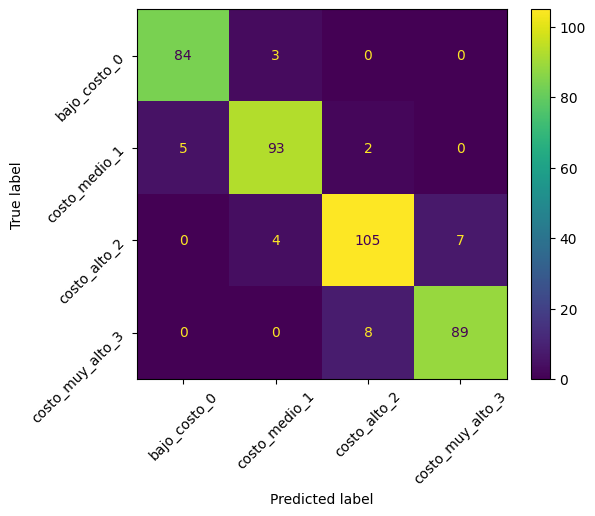

In [26]:
#Matriz de confusión para modelo Neuronal 
y_labels = [0, 1, 2, 3]
cm = confusion_matrix(y_test, y_pred, labels=y_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_label)
disp.plot()
plt.xticks(rotation=45)  
plt.yticks(rotation=45)  
plt.show()

Interpretación de la matriz

* bajo_costo_0:
- 84 TP, 3 FP
* costo_medio_1
- 93 TP, 2 FP, 5 FN
* Costo_alto_2:
- 105 TP, 7 FP, 4 FN
* Costo_muy_alto_3:
- 89 TP, 8 FN

### 4. **Conclusiones**

Como ya pudimos verlo en la actividad, nuestro modelo SVM con kernel lineal tuvo mejor accuracy que la red neural, por diferentes factores que he notado e investigado durante el desarrollo de la actividad, los cuales voy a enumerar a manera de lista, detallando cada uno de ellos de manera clara:

1. *Tamaños de dataset:* De acuerdo a varios autores, desarrolladores y por su puesto a los resultados de la actividad concluyo, las SVM tienden a tener un mejor funcionamiento en dataset medianos y pequeños, así como ya lo hemos visto en esta actividad. El dataset al estar balanceado y de no tener valores nulos influyo demasiado, sumado al correcto desarrollo del EDA nos dio como resultado un modelo altamente preciso. Además, al realizar él tuneo de hiperparámetros, logramos aumentar la precisión un .01. Generalmente, las redes neuronales utilizan grandes cantidades de datos para alcanzar su máximo desempeño.
2. *Hiperparámetros no optimizados:* Otro de los motivos por el cual la red neuronal, pudo no haber llegado a su máximo desempeño, es que los hiperparámetros no estén bien optimizados, y la SVM, al ser menos sensible a la elección de hiperparámetros en comparación con las redes neuronales dio como resultado un accuracy mayor.
3. *Sobreajuste (overfitting):* Al tener un modelo neuronal con muchas capas y neuronas con un dataset muy pequeño pudo ocasionar sobreajuste (Overfitting), y la SVM pudimos regularla con un el parámetro C, que nos ayuda a controlar el sobreajuste.
4. *Tuning de hiperparámetros y alternativas de mejora:* Para mejorar la red neuronal, podría utilizarse la técnica de GridSearchCV para buscar una mejor combinación de hiperparámetros (número de capas, neuronas, tasa de aprendizaje). También se podría aumentar el tamaño del dataset para poder mejorar el rendimiento y evitar un posible sobreajuste. Si no es posible tener un dataset mayor, podríamos cambiar la arquitectura de la red neuronal (número de capas, neuronas, funciones de activación, etc.).

En general, el hecho de que el SVM tenga un mejor accuracy que la red neuronal en nuestro caso puede deberse a una combinación de factores, como el tamaño del dataset, la elección de hiperparámetros, la complejidad del problema y el preprocesamiento de datos. No siempre las redes neuronales son la mejor opción; modelos más simples como SVM pueden ser más efectivos en ciertos escenarios. 

### 5. **Bibliografía**

- Sossa Azuela & Reyes Cortés. (2020). “Inteligencia Artificial Aplicada a Robótica y Automatización”
- Wes McKinney. (2023). "Python para análisis de datos"